We are following the following approach:
    1. problem statement
   
       * we have a regression problem
       
    2. data
    
       * data comes from kaggle competition: https://www.kaggle.com/c/titanic/data
                       
    3. evaluation
         * If we achieve 0.8% of accuracy in predicting whether a passenger has survived or not, we will pursue this project.
         
    4. features
         
                Variable	Definition	Key
                survival	Survival	0 = No, 1 = Yes
                pclass	    Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
                sex	        Sex	
                Age	        Age in years	
                sibsp	    # of siblings / spouses aboard the Titanic	
                parch	    # of parents / children aboard the Titanic	
                ticket	    Ticket number	
                fare	    Passenger fare	
                cabin	    Cabin number	
                embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southamp
                
               Variable Notes 
                    pclass: A proxy for socio-economic status (SES) 
                    1st = Upper 
                    2nd = Middle 
                    3rd = Lower
 
                    age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
 
                    sibsp: The dataset defines family relations in this way... 
                    Sibling = brother, sister, stepbrother, stepsister 
                    Spouse = husband, wife (mistresses and fiancés were ignored)
 
                    parch: The dataset defines family relations in this way... 
                    Parent = mother, father 
                    Child = daughter, son, stepdaughter, stepson 
                    Some children travelled only with a nanny, therefore parch=0 for them.
    5. modelling
    * Random Forest Regressor
    
    5. experimentation
 
 

In [956]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


In [957]:
train = pd.read_csv("train_titanic.csv")
test = pd.read_csv("test_titanic.csv")

In [958]:
len(train), len(test)

(891, 418)

In [959]:
# we need to clean the data, convert strings to numbers, and manage null values

train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [960]:
train["Age"].fillna(train["Age"].mean(),inplace = True)
# test["Age"].fillna(test["Age"].mean(), inplace = True)

In [961]:
test.isna().sum(), train.isna().sum()

(PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age              0
 SibSp            0
 Parch            0
 Ticket           0
 Fare             1
 Cabin          327
 Embarked         0
 dtype: int64, PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age              0
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         2
 dtype: int64)

In [962]:
train.Embarked.fillna(value ="S", inplace =True)
# test.Embarked.fillna(value="S", inplace = True)

In [963]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [964]:
train.Fare.fillna(train["Fare"].mean(), inplace = True)
# test.Fare.fillna(test["Fare"].mean(), inplace = True)

In [965]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [966]:
train["Cabin_No"] = train["Cabin"].notnull().astype(int)
# test["Cabin_No"] = test["Cabin"].notnull().astype(int)



In [967]:
train.drop(["Name","Ticket", "Cabin"], axis = 1, inplace = True)
# test.drop(["Name","Ticket", "Cabin"], axis = 1, inplace = True)

In [968]:
train["Fare"] = train['Fare'].round(2)
# test["Fare"] = test["Fare"].round(2)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_No
0,1,0,3,male,22.0,1,0,7.25,S,0
1,2,1,1,female,38.0,1,0,71.28,C,1
2,3,1,3,female,26.0,0,0,7.92,S,0
3,4,1,1,female,35.0,1,0,53.10,S,1
4,5,0,3,male,35.0,0,0,8.05,S,0


##  Visualizations

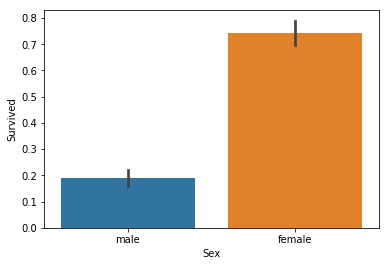

In [969]:
sns.barplot(x= train["Sex"], y = train["Survived"]);

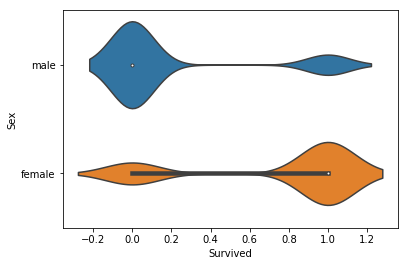

In [970]:
sns.violinplot(x= "Survived", y= "Sex", data = train)

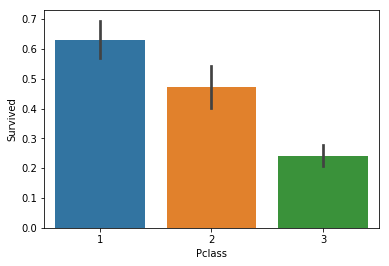

In [971]:
sns.barplot(x= "Pclass", y = "Survived", data = train)

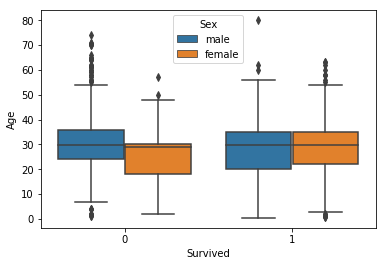

In [972]:
sns.boxplot(x= train["Survived"], y =train["Age"], hue= train["Sex"]);

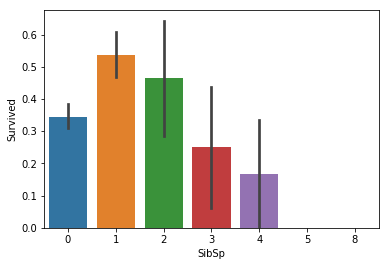

In [973]:
sns.barplot(x = "SibSp", y = "Survived", data = train)

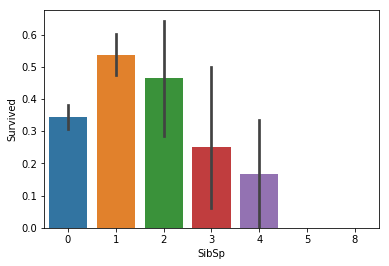

In [974]:
sns.barplot(x = "SibSp", y = "Survived", data = train)

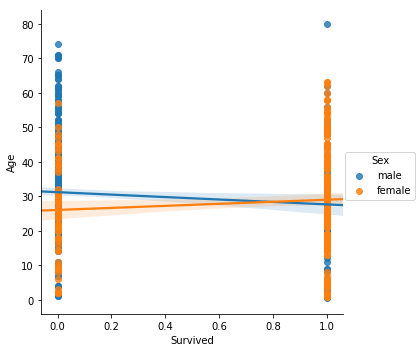

In [975]:
sns.lmplot(x = "Survived", y = "Age", hue = "Sex", data = train)

In [976]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_No
0,1,0,3,male,22.0,1,0,7.25,S,0
1,2,1,1,female,38.0,1,0,71.28,C,1
2,3,1,3,female,26.0,0,0,7.92,S,0
3,4,1,1,female,35.0,1,0,53.10,S,1
4,5,0,3,male,35.0,0,0,8.05,S,0


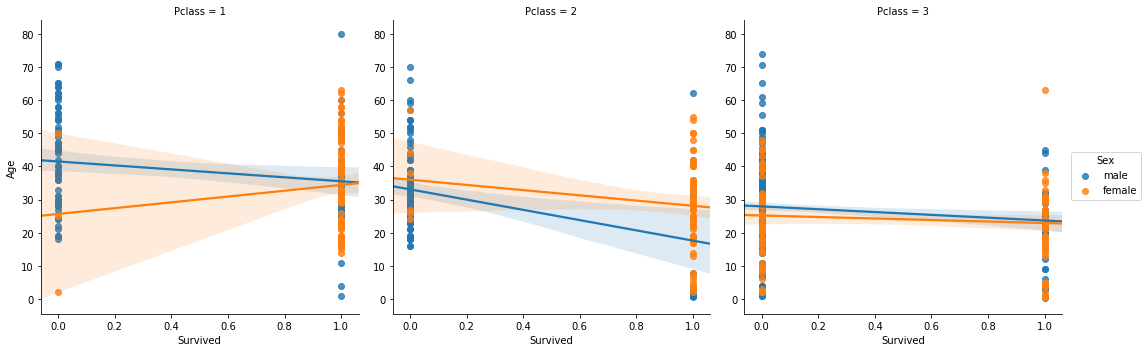

In [977]:
sns.lmplot(x = "Survived", y = "Age", hue = "Sex", col = "Pclass", data = train);

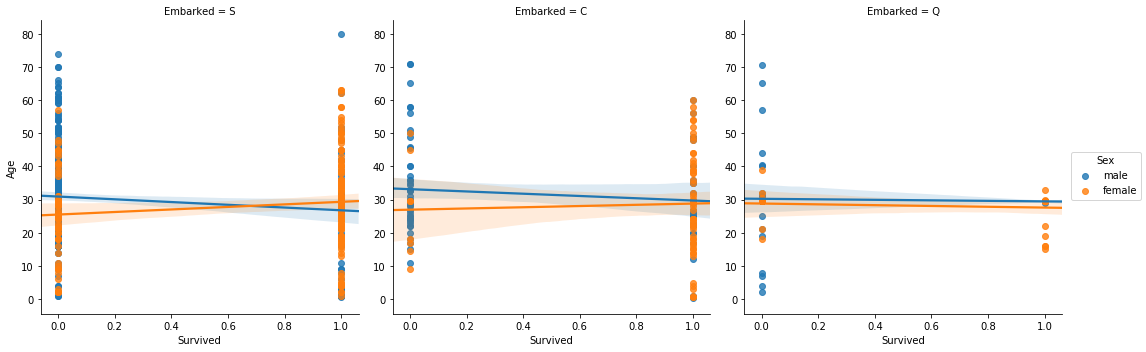

In [978]:
sns.lmplot(x = "Survived", y = "Age", hue = "Sex", col = "Embarked", data = train);

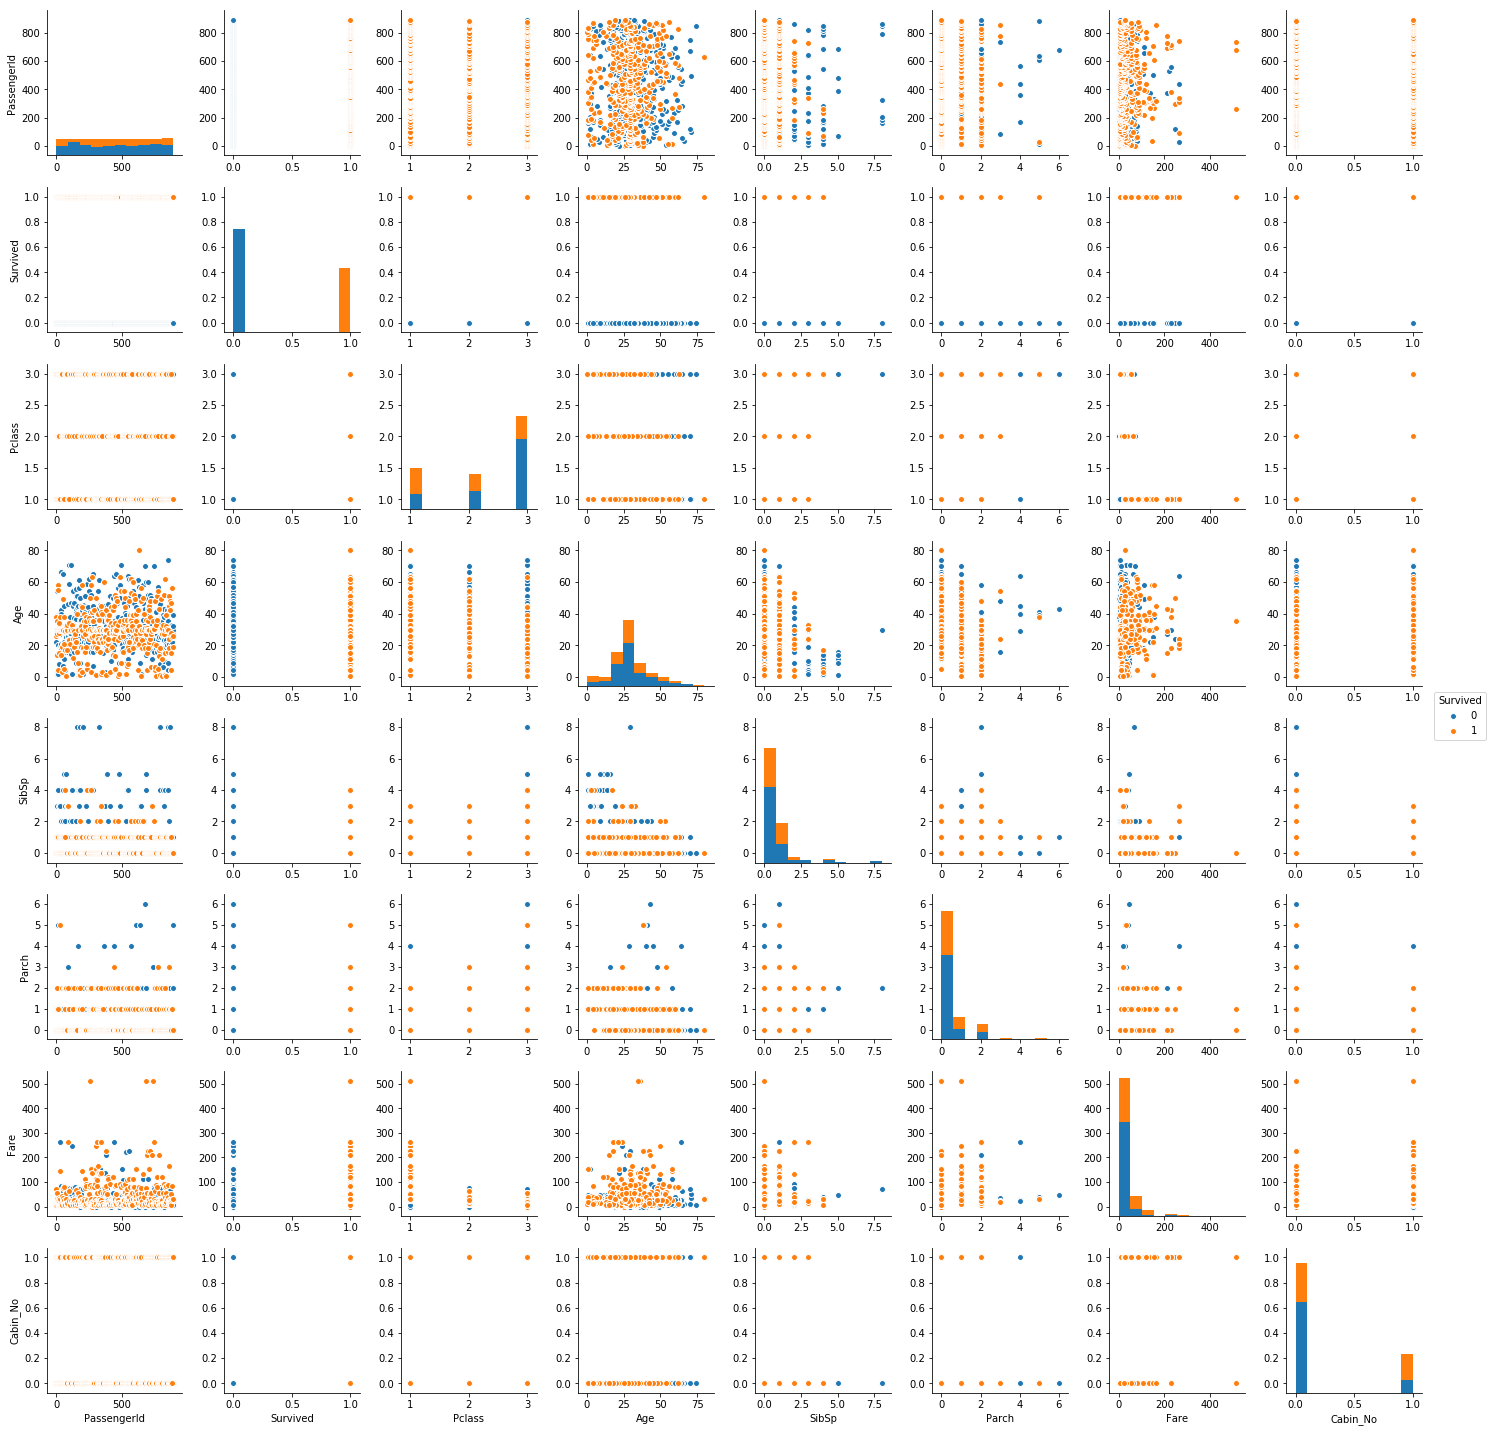

In [979]:
sns.pairplot(train, hue= "Survived")

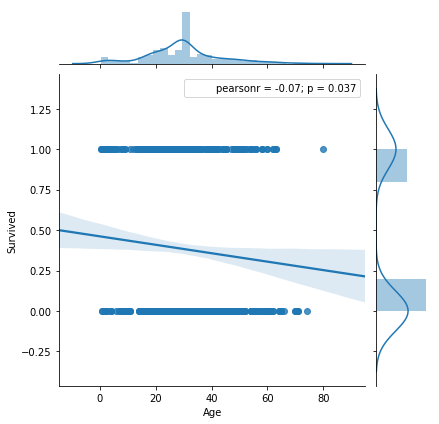

In [980]:
sns.jointplot(x = "Age", y = "Survived", data = train, kind = "reg")

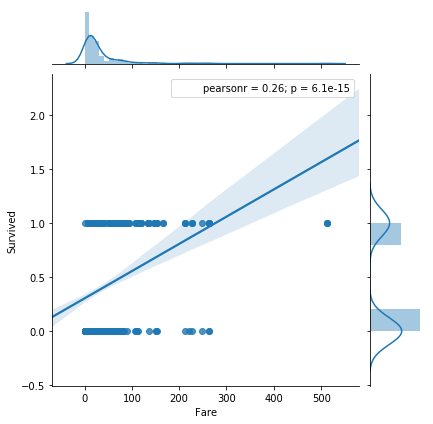

In [981]:
sns.jointplot(x = "Fare", y = "Survived", data = train, kind = "reg")

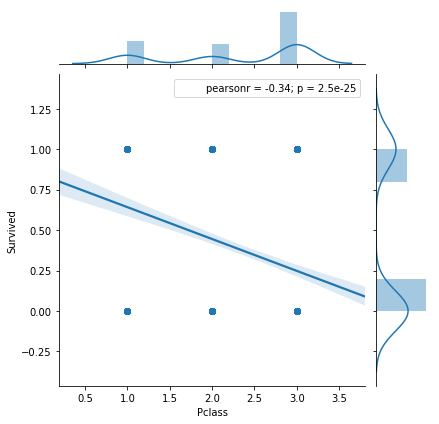

In [982]:
sns.jointplot(x = "Pclass", y = "Survived", data = train, kind = "reg")

In [984]:
def age_buckets(x): 
    if x < 1: return 'Infants' 
    elif x < 11: return 'Children' 
    elif x < 17: return 'Teen' 
    elif x < 30: return 'Young' 
    elif x < 65: return 'Adult' 
    elif x >=65: return 'Elderly' 
    

train["Age_Group"] =train.Age.apply(age_buckets)
# test["Age_Group"] =test.Age.apply(age_buckets)



In [985]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()

train["Sex"] = number.fit_transform(train["Sex"].astype(str))
train["Embarked"] = number.fit_transform(train["Embarked"].astype(str))
train["Age_Group"] = number.fit_transform(train["Age_Group"].astype(str))

# test["Sex"] = number.fit_transform(test["Sex"].astype(str))
# test["Embarked"] = number.fit_transform(test["Embarked"].astype(str))
# test["Age_Group"] = number.fit_transform(test["Age_Group"].astype(str))


In [987]:
train = train.drop(["Age"], axis = 1)

In [988]:
train

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Cabin_No,Age_Group
0,1,0,3,1,1,0,7.25,2,0,5
1,2,1,1,0,1,0,71.28,0,1,0
2,3,1,3,0,0,0,7.92,2,0,5
3,4,1,1,0,1,0,53.10,2,1,0
4,5,0,3,1,0,0,8.05,2,0,0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,0,0,13.00,2,0,5
887,888,1,1,0,0,0,30.00,2,1,5
888,889,0,3,0,1,2,23.45,2,0,5
889,890,1,1,1,0,0,30.00,0,1,5


In [508]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int32
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       891 non-null int32
Cabin_No       891 non-null int32
Age_Group      891 non-null int32
dtypes: float64(2), int32(4), int64(5)
memory usage: 62.7 KB


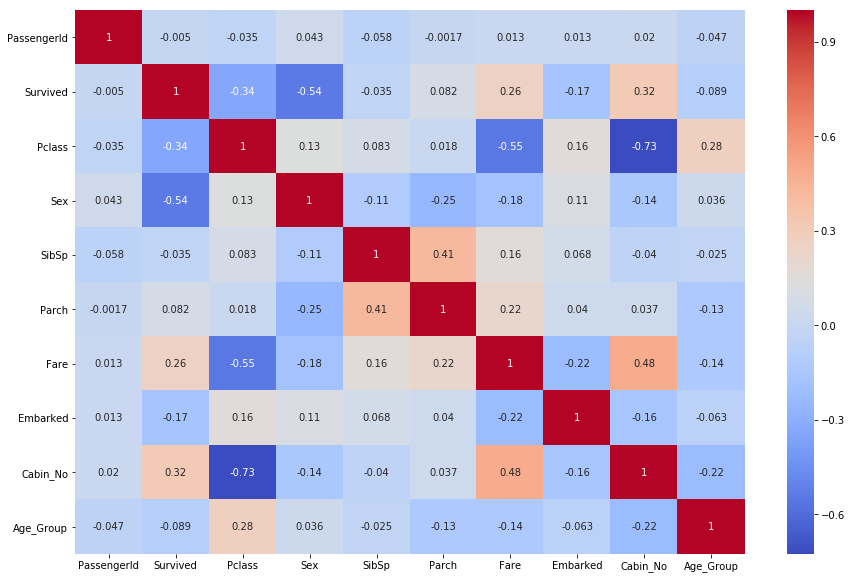

In [989]:
plt.figure(figsize=(15,10))
sns.heatmap(train.corr(), annot=True, cmap="coolwarm")

## Modelling

In [990]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Cabin_No,Age_Group
0,1,0,3,1,1,0,7.25,2,0,5
1,2,1,1,0,1,0,71.28,0,1,0
2,3,1,3,0,0,0,7.92,2,0,5
3,4,1,1,0,1,0,53.10,2,1,0
4,5,0,3,1,0,0,8.05,2,0,0


In [991]:
x = train.drop(["PassengerId", "Survived"], axis = 1)
y= train["Survived"]

In [992]:
len(x), len(y)

(891, 891)

# Modelling


Three models based on Skealrn macine learning map or cheat sheet

    Logistic Regression
    K-nearest classification
    Random classifier

In [993]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.776536312849162

In [994]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
rf_classifier.score(X_test, y_test)

0.7541899441340782

In [995]:

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.7206703910614525

In [996]:
Accuracy_scores = {"Logistic":lr.score(X_test, y_test), "KNN": knn.score(X_test, y_test), "Random_forest": rf_classifier.score(X_test, y_test)}
Accuracy_scores

{'KNN': 0.7206703910614525,
 'Logistic': 0.776536312849162,
 'Random_forest': 0.7541899441340782}

In [997]:
Accuracy_scores=pd.DataFrame(Accuracy_scores, index = ["Accuracy"])


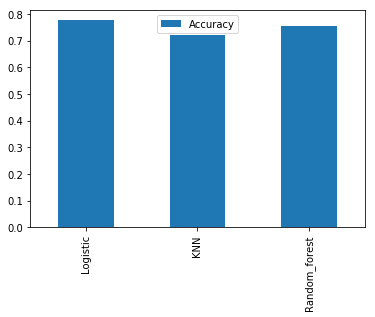

In [998]:
Accuracy_scores.T.plot.bar() 

## Tuning hyperparameters

In [999]:
#Logistic regression

lr_random_grid = {"C": np.arange(4,48,4), "solver": ["liblinear"]} 

lr_randomsearchCV = RandomizedSearchCV(LogisticRegression(), param_distributions= lr_random_grid, cv=5, n_iter=20, verbose=True )
lr_randomsearchCV.fit(X_train, y_train);
lr_randomsearchCV.best_params_
lr = LogisticRegression(C=lr_randomsearchCV.best_params_["C"], solver=lr_randomsearchCV.best_params_["solver"] )
lr_tuned = lr.fit(X_train, y_train)
lr_tuned.score(X_test, y_test)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.3s finished


0.7821229050279329

In [1000]:
# KNN

knn_grid = {"n_neighbors": list(range(1,50))}

knn_randomsearchCV = RandomizedSearchCV(KNeighborsClassifier(), param_distributions=knn_grid,cv=5,  verbose=True  )
knn_randomsearchCV.fit(X_train, y_train);

knn_randomsearchCV.best_params_
knn_tuned = KNeighborsClassifier(n_neighbors=knn_randomsearchCV.best_params_["n_neighbors"])

knn_tuned.fit(X_train, y_train)
knn_tuned.score(X_test, y_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.3s finished


0.7374301675977654

   ### Random forest hyperparameters 
    n_estimators = number of trees in the foreset
    max_features = max number of features considered for splitting a node
    max_depth = max number of levels in each decision tree
    min_samples_split = min number of data points placed in a node before the node is split
    min_samples_leaf = min number of data points allowed in a leaf node
    bootstrap = method for sampling data points (with or without replacement)

In [1075]:
#Random Forest

rf_grid = {"n_estimators": np.arange(10,1000,50), "max_depth": [None, 3,5,10], 
            "min_samples_split":np.arange(2,20,2), "min_samples_leaf": np.arange(1,20,2)}

rf_randomsearchCV = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rf_grid, cv=15, n_iter=2, verbose=True)
rf_randomsearchCV.fit(X_train, y_train)

rf_randomsearchCV.best_params_

rf_tuned = RandomForestClassifier(max_depth=rf_randomsearchCV.best_params_["max_depth"], 
                                  min_samples_leaf = rf_randomsearchCV.best_params_["min_samples_leaf"],
                                 min_samples_split = rf_randomsearchCV.best_params_["min_samples_split"],
                                 n_estimators =rf_randomsearchCV.best_params_["n_estimators"])

rf_tuned.fit(X_train, y_train)
rf_tuned.score(X_test, y_test)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   10.9s finished


0.7988826815642458

In [1002]:
Tuned_scores = {"Logistic":lr_tuned.score(X_test, y_test), 
                "Random Forest": rf_tuned.score(X_test, y_test), 
                "KNN": knn_tuned.score(X_test, y_test)}

In [1003]:
Tuned_score = pd.DataFrame(Tuned_scores, index = ["Accuracy Scores"])
Tuned_score

,Logistic,Random Forest,KNN
Accuracy Scores,0.782123,0.815642,0.73743


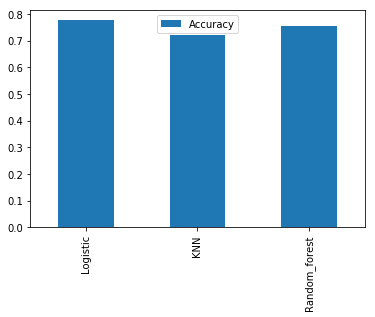

In [1004]:
Accuracy_scores.T.plot.bar()

## Grid Search

In [1005]:
# logistic regression tunning parameters

np.random.seed (21)

lr_grid_params = {"C": np.logspace(-4,4,30), "solver": ["liblinear"]} 

lr_gridsearchcv = GridSearchCV(LogisticRegression(), param_grid=lr_grid_params, cv=5, verbose= True)
lr_gridsearchcv.fit(X_train, y_train)
lr_gridsearchcv.best_params_
# do model based on best parameters

LR_tuned = LogisticRegression(C= lr_gridsearchcv.best_params_["C"], solver=lr_gridsearchcv.best_params_["solver"])

LR_tuned.fit(X_train, y_train)
LR_Accuracy = LR_tuned.score(X_test, y_test)
LR_Accuracy

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.7s finished


0.7821229050279329

In [1006]:
# random forest tunning parameters

RF_grid = {"n_estimators": np.arange(10,50,10), "max_depth": [None, 3,5,10], 
            "min_samples_split":np.arange(2,20,2), "min_samples_leaf": np.arange(1,4,2)}

RF_gridsearch = GridSearchCV(RandomForestClassifier(), param_grid=RF_grid, cv=2, verbose=True)

RF_gridsearch.fit(X_train, y_train)
RF_gridsearch.best_params_

RF_tuned = RandomForestClassifier(max_depth= RF_gridsearch.best_params_["max_depth"], min_samples_leaf=RF_gridsearch.best_params_["min_samples_leaf"], min_samples_split= RF_gridsearch.best_params_["min_samples_split"], n_estimators=RF_gridsearch.best_params_["n_estimators"])
RF_tuned
RF_tuned.fit(X_train, y_train)
RF_tuned.score(X_test, y_test)

Fitting 2 folds for each of 288 candidates, totalling 576 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 576 out of 576 | elapsed:   23.0s finished


0.7877094972067039

In [1008]:
# KNN tuning parameters

KNN_grid = {"n_neighbors": list(range(1,50)), "leaf_size": np.arange(2,10,2)}
KNN_gridsearch = GridSearchCV(KNeighborsClassifier(), param_grid= KNN_grid, cv=5,  verbose=True  )
KNN_gridsearch.fit(X_train, y_train);

KNN_gridsearch.best_params_
KNN_tuned = KNeighborsClassifier(n_neighbors=knn_randomsearchCV.best_params_["n_neighbors"], leaf_size=KNN_gridsearch.best_params_["leaf_size"])

KNN_tuned.fit(X_train, y_train)
KNN_tuned.score(X_test, y_test)

Fitting 5 folds for each of 196 candidates, totalling 980 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 980 out of 980 | elapsed:   32.8s finished


0.7318435754189944

In [1009]:
Tuned_scores_Grid = {"Logistic":LR_tuned.score(X_test, y_test), 
                "Random Forest": RF_tuned.score(X_test, y_test), 
                "KNN": KNN_tuned.score(X_test, y_test)}

Tuned_scores_Grid = pd.DataFrame(Tuned_scores_Grid, index=["Accuracy Score"])
Tuned_scores_Grid

,Logistic,Random Forest,KNN
Accuracy Score,0.782123,0.787709,0.731844


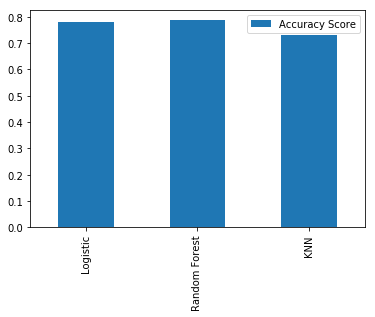

In [1010]:
Tuned_scores_Grid.T.plot.bar()

### let's calculate evaluation matrices using cross validation


In [1110]:

from sklearn.model_selection import cross_val_score

#check best param

rf_randomsearchCV.best_params_

#cross validated auracy
rf_tuned = RandomForestClassifier(max_depth=rf_randomsearchCV.best_params_["max_depth"], 
                                  min_samples_leaf = rf_randomsearchCV.best_params_["min_samples_leaf"],
                                 min_samples_split = rf_randomsearchCV.best_params_["min_samples_split"],
                                 n_estimators =rf_randomsearchCV.best_params_["n_estimators"])


cv_acc = cross_val_score(rf_tuned, x, y, cv=5, verbose=True, scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.8s finished


0.7913604821924494

In [1111]:
#cross validated Precision

cv_precision = cross_val_score(rf_tuned, x, y, cv=5, verbose=True, scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.6s finished


0.8059185401381889

In [1112]:
#cross validated recall

cv_recall = cross_val_score(rf_tuned, x, y, cv=5, verbose=True, scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.1s finished


0.6172208013640239

In [1113]:
#cross validated f1

cv_f1 = cross_val_score(rf_tuned, x, y, cv=5, verbose=True, scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.1s finished


0.6906975856201454

In [1114]:
#visualize as metrics

metrics_compare = pd.DataFrame({"Cross validated Accuracy":cv_acc,
                  "Cross validated Precision": cv_precision,
                  "Cross validated Recall": cv_recall,
                  "Cross validated F1": cv_f1}, index =[1])
metrics_compare

,Cross validated Accuracy,Cross validated Precision,Cross validated Recall,Cross validated F1
1,0.79136,0.805919,0.617221,0.690698


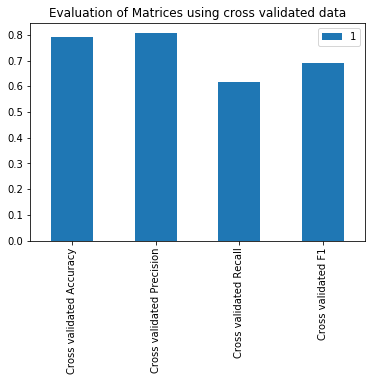

In [1119]:
metrics_compare.T.plot.bar(title = "Evaluation of Matrices using cross validated data")

In [1121]:
 # Attach a text label above each bar displaying its height
    
for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

NameError: name 'rects' is not defined

## Test Data

In [1016]:
X_test

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Cabin_No,Age_Group
801,2,0,1,1,26.25,2,0,0
166,1,0,0,1,55.00,2,1,5
493,1,1,0,0,49.50,0,0,2
612,3,0,1,0,15.50,1,0,5
196,3,1,0,0,7.75,1,0,5
...,...,...,...,...,...,...,...,...
445,1,1,0,2,81.86,2,1,1
882,3,0,0,0,10.52,2,0,5
265,2,1,0,0,10.50,2,0,0
888,3,0,1,2,23.45,2,0,5


In [1029]:
test = pd.read_csv("test_titanic.csv")

test["Age"].fillna(test["Age"].mean(), inplace = True)
test.Embarked.fillna(value="S", inplace = True)
test.Fare.fillna(test["Fare"].mean(), inplace = True)
test["Cabin_No"] = test["Cabin"].notnull().astype(int)
test.drop(["Name","Ticket", "Cabin"], axis = 1, inplace = True)
test["Fare"] = test["Fare"].round(2)
test["Age"] = test["Age"].round(2)


def age_buckets(x): 
    if x < 1: return 'Infants' 
    elif x < 11: return 'Children' 
    elif x < 17: return 'Teen' 
    elif x < 30: return 'Young' 
    elif x < 65: return 'Adult' 
    elif x >=65: return 'Elderly' 
    

test["Age_Group"] =test.Age.apply(age_buckets)

test = test.drop(["Age"], axis =1)


number = LabelEncoder()

test["Sex"] = number.fit_transform(test["Sex"].astype(str))
test["Embarked"] = number.fit_transform(test["Embarked"].astype(str))
test["Age_Group"] = number.fit_transform(test["Age_Group"].astype(str))

In [1030]:
test

,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Embarked,Cabin_No,Age_Group
0,892,3,1,0,0,7.83,1,0,0
1,893,3,0,1,0,7.00,2,0,0
2,894,2,1,0,0,9.69,1,0,0
3,895,3,1,0,0,8.66,2,0,5
4,896,3,0,1,1,12.29,2,0,5
...,...,...,...,...,...,...,...,...,...
413,1305,3,1,0,0,8.05,2,0,0
414,1306,1,0,0,0,108.90,0,1,0
415,1307,3,1,0,0,7.25,2,0,0
416,1308,3,1,0,0,8.05,2,0,0


In [1032]:
PassengerId = test["PassengerId"]
test.drop(["PassengerId"], axis = 1, inplace = True)

## Prediction

In [1033]:
# Logistic Regression

y_pred_LR = LR_tuned.predict(test)
y_pred_LR

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [1038]:
# Random_Forest

y_pred_RF = RF_tuned.predict(test)
y_pred_RF

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [1039]:
# KNN

y_pred_KNN = KNN_tuned.predict(test)
y_pred_KNN

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [1050]:
Pred_Output = pd.DataFrame({"Passenger ID": PassengerId, 
                            "Logistic Regression":y_pred_LR, 
                            "Random_forest": y_pred_RF, "KNN": y_pred_KNN })
Pred_Output

,Passenger ID,Logistic Regression,Random_forest,KNN
0,892,0,0,0
1,893,1,0,0
2,894,0,0,0
3,895,0,0,0
4,896,1,1,1
...,...,...,...,...
413,1305,0,0,0
414,1306,1,1,1
415,1307,0,0,0
416,1308,0,0,0


In [1052]:
Pred_Output.to_csv("Submission_titanic_Ayu.csv")

In [1053]:
len(Pred_Output)

418

Althogh I have applied both RandomSeacrhCV and GridSeach to hyperparameter tunning, 
I have chosen Random forest classifier for the competiion (tuned by RandomSearchCV) as it revealed the highest score.

In [1054]:
y_pred_rf = rf_tuned.predict(test)
y_pred_rf

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [1055]:
submission_Ayu = pd.DataFrame({"PassengerId": PassengerId, "Survived": y_pred_rf})
submission_Ayu

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [1058]:
submission_Ayu.to_csv("submssion_Ayu.csv", index = False)

In [1059]:
submission_Ayu.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


## Feature importance

  which featurs are more important in predicting the label.

In [1079]:
#Random Forest


#with best hyperparameter result: rf_randomsearchCV.best_params_

rf_tuned = RandomForestClassifier(max_depth=rf_randomsearchCV.best_params_["max_depth"], 
                                  min_samples_leaf = rf_randomsearchCV.best_params_["min_samples_leaf"],
                                 min_samples_split = rf_randomsearchCV.best_params_["min_samples_split"],
                                 n_estimators =rf_randomsearchCV.best_params_["n_estimators"])

rf_tuned.fit(X_train, y_train)
rf_tuned.score(X_test, y_test)

0.8044692737430168

In [1098]:
rf_tuned.feature_importances_

array([0.12533484, 0.48940028, 0.03392474, 0.02868215, 0.16451861,
       0.04048365, 0.09467707, 0.02297865])

In [1103]:
Feature_importance = dict(zip(test.columns, list(rf_tuned.feature_importances_)))
Feature_importance

{'Age_Group': 0.022978654878319585,
 'Cabin_No': 0.09467707071608977,
 'Embarked': 0.0404836511208412,
 'Fare': 0.16451861173138993,
 'Parch': 0.02868215496136212,
 'Pclass': 0.12533484093775515,
 'Sex': 0.48940027544610054,
 'SibSp': 0.03392474020814214}

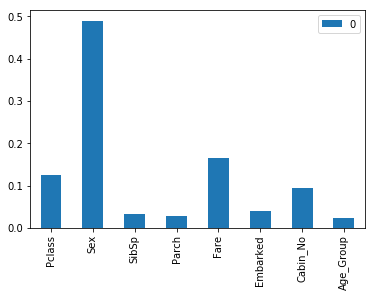

In [1106]:
Feature = pd.DataFrame(Feature_importance, index =[0])

Feature.T.plot.bar()



In [1123]:
Titanic_Data_manipulation_prediction.to_csv(r"C:\Aye backup\Python\Udemy\zero-to-mastery-ml-master\My project_Titanic survival prediction\Titanic_Data_manipulation_prediction.csv")

NameError: name 'Titanic_Data_manipulation_prediction' is not defined